In [1]:
import os
import matplotlib.pyplot as plt
import nibabel as nb
import numpy as np
import time

from _3dpu_mehdi  import *
from _3dpu import *

In [2]:
!pip3 install ipympl
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: C:\Users\0\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
chemin = r"C:\Users\0\OneDrive\Documents\Montréal 4A\Les études\Chair AI-SCALE\ph.nii"
phase_image = nb.load( chemin)
x_min,x_max = 60,140
y_min,y_max = 60,140
z_min,z_max = 10,60
t = 1
data = phase_image.get_data()[x_min:x_max,y_min:y_max,z_min:z_max,1]
#data = phase_image.get_data()[:,:,:,1]

C:\Users\0\AppData\Local\Temp\ipykernel_36140\2249129986.py:7: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  data = phase_image.get_data()[x_min:x_max,y_min:y_max,z_min:z_max,1]


In [4]:
chemins, P,cheminement = [],[0],[]
data.shape

(80, 80, 50)

In [5]:
Sat = all_residuals(data)
with open('readme.txt', 'w') as f:
    Sat = residual_loops(chemins,f,Sat)
    

AttributeError: '_io.TextIOWrapper' object has no attribute 'items'

In [5]:
St = all_residuals(data)

In [6]:
psi = data
shape = psi.shape
# Store the list of all residuals.
res = []
for a in range(dim):
    res.append(residuals(psi, a))
marker1 = {}
unprocess_all(res, marker1)
# r = unprocessed_residual(marker)
# l = search_loop(SpinnedResidual(1, r), shape, marker, False)

In [7]:
#code _3dpu.py
marker2 = {}
loops = []
l = residual_loops(loops,marker2,data)


joining loops
joining loops
joining loops
joining loops
SpinnedResidual(spin=1, res=Residual(ax=1, ori=1, pos=array([ 1, 79,  6])))

True


ValueError: 

In [9]:
marker1 = {}
unprocess_all(res,marker1)
s = SpinnedResidual(spin=1, res=Residual(ax=1, ori=1, pos=np.array([ 1, 79,  6])))
next_residual(s,marker2,True)


SpinnedResidual(spin=1, res=Residual(ax=0, ori=-1, pos=array([ 2, 78,  6])))

In [18]:
retrouve = SpinnedResidual(spin=1, res=Residual(ax=0, ori=-1, pos=np.array([ 2, 78,  6])))
for i,loop in enumerate(loops):
    if SpinnedResidual(1,retrouve.res) in loop.loop:
        print(loop)

loops[13]

FlaggedLoop(closed=True, loop=[SpinnedResidual(spin=-1, res=Residual(ax=2, ori=1, pos=array([51, 68,  0]))), SpinnedResidual(spin=1, res=Residual(ax=0, ori=1, pos=array([52, 68,  0]))), SpinnedResidual(spin=-1, res=Residual(ax=2, ori=1, pos=array([51, 68,  0])))])


FlaggedLoop(closed=True, loop=[SpinnedResidual(spin=-1, res=Residual(ax=2, ori=1, pos=array([51, 68,  0]))), SpinnedResidual(spin=1, res=Residual(ax=0, ori=1, pos=array([52, 68,  0]))), SpinnedResidual(spin=-1, res=Residual(ax=2, ori=1, pos=array([51, 68,  0])))])

In [20]:
for loop in loops :
    for pos in loop.loop:
        if marker2[pos.res] == 0:
            print(pos)
# list(marker2.keys())

In [6]:
r = unprocessed_residual(marker2)
search_loop(SpinnedResidual(1,r),shape,marker=marker2)

-1 SpinnedResidual(spin=1, res=Residual(ax=0, ori=1, pos=array([53, 69,  0]))) [SpinnedResidual(spin=1, res=Residual(ax=0, ori=1, pos=array([53, 69,  0])))]


FlaggedLoop(closed=False, loop=[SpinnedResidual(spin=1, res=Residual(ax=0, ori=1, pos=array([53, 69,  0]))), SpinnedResidual(spin=-1, res=Residual(ax=2, ori=-1, pos=array([53, 69,  0])))])

In [31]:
marker2[( Residual(ax=0, ori=1, pos=np.array([53, 69,  0])))]

0

In [42]:
s = SpinnedResidual(spin=1, res=Residual(ax=0, ori=1, pos=np.array([53, 68,  0])))



next_residual(s,marker2,False)

# for loop in loops:
#     print()
#     print(loop)

# loops[-2] = loops[-2][1]


SpinnedResidual(spin=1, res=Residual(ax=0, ori=1, pos=array([54, 68,  0])))

In [9]:
v = SpinnedResidual(spin=1, res=Residual(ax=0, ori=1, pos=np.array([53, 68,  0])))

# search_loop(v,shape,marker2,True)

potential_neighbors(v,True)

[SpinnedResidual(spin=-1, res=Residual(ax=0, ori=1, pos=array([52, 68,  0]))),
 SpinnedResidual(spin=-1, res=Residual(ax=1, ori=1, pos=array([52, 68,  0]))),
 SpinnedResidual(spin=1, res=Residual(ax=1, ori=-1, pos=array([52, 69,  0]))),
 SpinnedResidual(spin=-1, res=Residual(ax=2, ori=1, pos=array([52, 68,  0]))),
 SpinnedResidual(spin=1, res=Residual(ax=2, ori=-1, pos=array([52, 68,  1])))]

In [10]:
for k in potential_neighbors(v,True):
    if k.res in marker1  :  
        print(k)
        print("marker1",marker1[k.res])
        print("marker2",marker2[k.res])

SpinnedResidual(spin=-1, res=Residual(ax=0, ori=1, pos=array([52, 68,  0])))
marker1 -1
marker2 1


In [17]:
loops[4]


FlaggedLoop(closed=False, loop=[SpinnedResidual(spin=1, res=Residual(ax=0, ori=1, pos=array([ 0, 78,  5]))), SpinnedResidual(spin=1, res=Residual(ax=2, ori=1, pos=array([ 0, 78,  6]))), SpinnedResidual(spin=-1, res=Residual(ax=0, ori=-1, pos=array([ 0, 78,  6])))])

In [8]:
def next_residual(curr: SpinnedResidual, marker: ResidualMarker, reverse: bool = False, shuffle: bool = True):
    # List of potential neighbors.
    neighbors = potential_neighbors(curr, reverse)
    l = []
    # Shuffle the list of neighbors if asked to.
    if shuffle:
        random.shuffle(neighbors)

    # Look for the first neighbor that has not been
    # yet processed.
    for spinned_residual in neighbors:
        if spinned_residual.res in marker and marker[spinned_residual.res] == -1:
            l.append(spinned_residual)

    # Return None.
    return l

In [29]:
(marker2.values())

dict_values([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
def potential_neighbors(self: SpinnedResidual) -> list[SpinnedResidual]:
    # List of potential neighbors.
    neighbors = []
    # Add the neighbor with the same axis as
    # the current residual.
    npos = deepcopy(self.res.pos)
    npos[self.res.ax] += self.spin
    neighbors.append(SpinnedResidual(self.spin, Residual(self.res.ax, self.res.ori, npos)))

    # Add the neighbors for other axes.
    for d in range(1, dim):
        na = (self.res.ax + d) % dim
        if self.spin == 1:
            for i, ns in zip([0, 1], [-1, 1]):
                npos = deepcopy(self.res.pos)
                npos[na] += i*self.spin
                neighbors.append(SpinnedResidual(ns, Residual(na, self.res.ori * ns, npos)))
        if self.spin == -1:
            for i, ns in zip([0, 1], [1, -1]):
                npos = deepcopy(self.res.pos)
                npos[na] += i
                npos[self.res.ax] -= 1
                neighbors.append(SpinnedResidual(self.spin*ns, Residual(na, self.res.ori * ns, npos)))
    return neighbors

KeyboardInterrupt: 

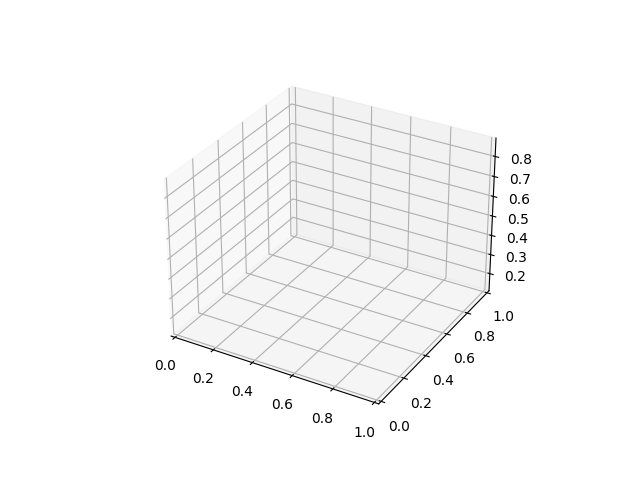

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')
X = []
Y = []
Z = []
for loop in loops:
    if  loop.closed:
        lasso_positions = []
        for r in loop.loop:
            pos = [r.res.ax] + list(r.res.pos)
            if pos[0] == 2:
                new_pos = [pos[1]+0.5,pos[2] + 0.5,pos[3]]
            elif pos[0] == 1:
                new_pos = [pos[1]+0.5,pos[2],pos[3]+0.5]
            elif pos[0] == 0:
                new_pos = [pos[1],pos[2] + 0.5,pos[3]+0.5]
                
            lasso_positions.append(new_pos)
        xs = [pos[0] for pos in lasso_positions]
        ys = [pos[1] for pos in lasso_positions]
        zs = [pos[2] for pos in lasso_positions]
        ax.plot(xs,ys,zs)
        Z = Z + zs
        X = X + xs
        Y = Y + ys

X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)
max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() / 2.0 + 0.5

mid_x = (X.max()+X.min()) * 0.5
mid_y = (Y.max()+Y.min()) * 0.5
mid_z = (Z.max()+Z.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)



In [11]:
len(marker.items())

240

In [50]:
def search_loop(start: SpinnedResidual, shape, marker: ResidualMarker, reverse: bool = False) -> FlaggedLoop:
    loop = []
    curr = start
    while True:
        loop.append(curr)
        marker[curr.res] = 0
        if curr.is_boundary(shape, reverse):
            # Boundary residual. FAUX !!
            return FlaggedLoop(False, loop)
        else:
            i = close_loop(curr, loop, reverse)
            print(i,curr,loop)
            if i != -1:
                # Unmark all residuals before i.
                mark_loop(loop[:i], marker, -1)

                # Mark all residuals after i as processed.
                mark_loop(loop[i:], marker, 1)

                loop = [curr] + loop[i:] 

                # Retreive only the loop.
                return FlaggedLoop(True, loop)
            else:
                # Get the next residual.
                neighbor = next_residual(curr, marker, reverse)
                if neighbor:
                    curr = neighbor
                    
                else:
                    # TODO: handle this.
                    raise ValueError()

In [18]:
[loop.closed for loop in loops]
loop = loops[0].loop
loop

[SpinnedResidual(spin=1, res=Residual(ax=0, ori=1, pos=array([ 0, 76,  1]))),
 SpinnedResidual(spin=1, res=Residual(ax=1, ori=1, pos=array([ 0, 77,  1]))),
 SpinnedResidual(spin=1, res=Residual(ax=0, ori=1, pos=array([ 1, 77,  1]))),
 SpinnedResidual(spin=1, res=Residual(ax=1, ori=1, pos=array([ 1, 78,  1]))),
 SpinnedResidual(spin=1, res=Residual(ax=2, ori=1, pos=array([ 1, 78,  2]))),
 SpinnedResidual(spin=-1, res=Residual(ax=0, ori=-1, pos=array([ 1, 78,  2]))),
 SpinnedResidual(spin=-1, res=Residual(ax=2, ori=-1, pos=array([ 0, 78,  2]))),
 SpinnedResidual(spin=-1, res=Residual(ax=1, ori=-1, pos=array([ 0, 78,  1])))]

In [51]:
unprocess_all(res,marker)
r = Residual(ax=0, ori=1, pos=np.array([ 0, 76,  1]))
d = search_loop(SpinnedResidual(1, r), shape, marker, False)

-1 SpinnedResidual(spin=1, res=Residual(ax=0, ori=1, pos=array([ 0, 76,  1]))) [SpinnedResidual(spin=1, res=Residual(ax=0, ori=1, pos=array([ 0, 76,  1])))]
-1 SpinnedResidual(spin=1, res=Residual(ax=1, ori=1, pos=array([ 0, 77,  1]))) [SpinnedResidual(spin=1, res=Residual(ax=0, ori=1, pos=array([ 0, 76,  1]))), SpinnedResidual(spin=1, res=Residual(ax=1, ori=1, pos=array([ 0, 77,  1])))]
-1 SpinnedResidual(spin=1, res=Residual(ax=0, ori=1, pos=array([ 1, 77,  1]))) [SpinnedResidual(spin=1, res=Residual(ax=0, ori=1, pos=array([ 0, 76,  1]))), SpinnedResidual(spin=1, res=Residual(ax=1, ori=1, pos=array([ 0, 77,  1]))), SpinnedResidual(spin=1, res=Residual(ax=0, ori=1, pos=array([ 1, 77,  1])))]
-1 SpinnedResidual(spin=1, res=Residual(ax=1, ori=1, pos=array([ 1, 78,  1]))) [SpinnedResidual(spin=1, res=Residual(ax=0, ori=1, pos=array([ 0, 76,  1]))), SpinnedResidual(spin=1, res=Residual(ax=1, ori=1, pos=array([ 0, 77,  1]))), SpinnedResidual(spin=1, res=Residual(ax=0, ori=1, pos=array([ 1,

In [52]:
d

FlaggedLoop(closed=True, loop=[SpinnedResidual(spin=-1, res=Residual(ax=1, ori=-1, pos=array([ 0, 78,  1]))), SpinnedResidual(spin=1, res=Residual(ax=0, ori=1, pos=array([ 1, 77,  1]))), SpinnedResidual(spin=1, res=Residual(ax=1, ori=1, pos=array([ 1, 78,  1]))), SpinnedResidual(spin=1, res=Residual(ax=2, ori=1, pos=array([ 1, 78,  2]))), SpinnedResidual(spin=-1, res=Residual(ax=0, ori=-1, pos=array([ 1, 78,  2]))), SpinnedResidual(spin=-1, res=Residual(ax=2, ori=-1, pos=array([ 0, 78,  2]))), SpinnedResidual(spin=-1, res=Residual(ax=1, ori=-1, pos=array([ 0, 78,  1])))])